In [1]:
# IMPORT LIBRARIES
import os 
import pandas as pd 
pd.set_option('display.max_columns', 500)
import dask
import dask.dataframe as dd
from dask.delayed import delayed
import numpy as np 
import config as cfg
from graphs import eda

{'base_dir': 'c:\\Users\\h1576\\Work\\Data Analysis Projects\\Jakarta Data Analysis\\Jakarta-MRT-Transaction', 'data_dir': 'c:\\Users\\h1576\\Work\\Data Analysis Projects\\Jakarta Data Analysis\\Jakarta-MRT-Transaction\\input', 'out_dir': 'c:\\Users\\h1576\\Work\\Data Analysis Projects\\Jakarta Data Analysis\\Jakarta-MRT-Transaction\\output'}


In [2]:
# Parameters
_DATSET_DIR = cfg.dirs["data_dir"]
_RAW_FILE_NAME = cfg._RAW_FILE_NAME
_RAW_SHEET_NAME = cfg._RAW_SHEET_NAME
_RAW_DATA_TYPE = cfg._RAW_DATA_TYPE
_PROCESSED_DATA_TYPE = cfg._PROCESSED_DATA_TYPE
_PROCESSED_FILE_NAME = cfg._PROCESSED_FILE_NAME
_PARQUETED_FILE_NAME = cfg._PARQUETED_FILE_NAME

In [3]:
mrt_tran_proc_df = dd.read_parquet( \
                os.path.join(_DATSET_DIR, "processed", _PROCESSED_FILE_NAME), \
                columns=_PROCESSED_DATA_TYPE.keys(), \
                engine='pyarrow')

In [4]:
mrt_tran_proc_df.head()

,Transaction Date,Transaction Day,Transaction Hour,Emoney,PAN,amount,TAP IN DATE,TAP IN TIME,TAP IN ID,TAP OUT DATE,TAP OUT TIME,TAP OUT ID,TAP IN,TAP OUT
0,2019-06-05 10:41:08,2,10,Bank B,754605******6791,12000,2019-06-05,10:09:41,0665,2019-06-05,10:41:08,0689,1637-Lebak bulus,1673-Bendungan Hilir
1,2019-06-05 14:24:59,2,14,Bank B,754627******8695,6000,2019-06-05,14:11:11,0679,2019-06-05,14:24:59,0689,1657-Blok M,1673-Bendungan Hilir
2,2019-06-05 15:31:40,2,15,Bank B,754602******9274,9000,2019-06-05,15:06:35,066D,2019-06-05,15:31:40,0689,1645-Cipete Raya,1673-Bendungan Hilir
3,2019-06-05 16:21:51,2,16,Bank B,754608******4785,7000,2019-06-05,16:01:58,0675,2019-06-05,16:21:51,0689,1653-Blok A,1673-Bendungan Hilir
4,2019-06-05 18:12:06,2,18,Bank B,754602******5632,7000,2019-06-05,17:53:30,0675,2019-06-05,18:12:06,0689,1653-Blok A,1673-Bendungan Hilir


In [5]:
mrt_tran_proc_df.compute().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712297 entries, 0 to 712296
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Transaction Date  712297 non-null  object
 1   Emoney            712297 non-null  object
 2   PAN               712297 non-null  object
 3   amount            712297 non-null  int64 
 4   TAP IN TIME       712297 non-null  object
 5   TAP IN ID         712297 non-null  object
 6   TAP OUT TIME      712297 non-null  object
 7   TAP OUT ID        712297 non-null  object
 8   TAP IN            712297 non-null  object
 9   TAP OUT           712297 non-null  object
dtypes: int64(1), object(9)
memory usage: 59.8+ MB


In [6]:
# Number of unique values in each column
mrt_tran_proc_df.compute().nunique()

Transaction Date    440421
Emoney                   5
PAN                  59234
amount                  12
TAP IN TIME         448521
TAP IN ID               13
TAP OUT TIME        440421
TAP OUT ID              13
TAP IN                  13
TAP OUT                 13
dtype: int64

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


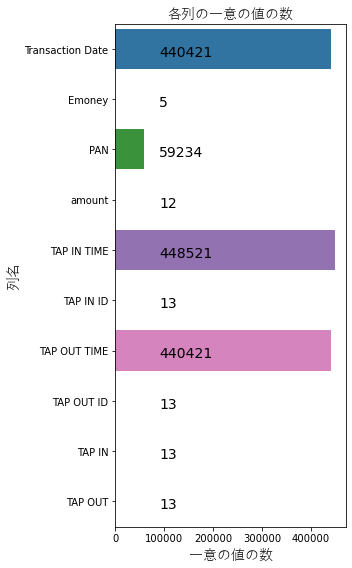

In [7]:
temp_dict = mrt_tran_proc_df.compute().nunique()
x_label = '一意の値の数'
y_label = '列名'
title = '各列の一意の値の数'
caption = 'Number of unique values in each column'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption)

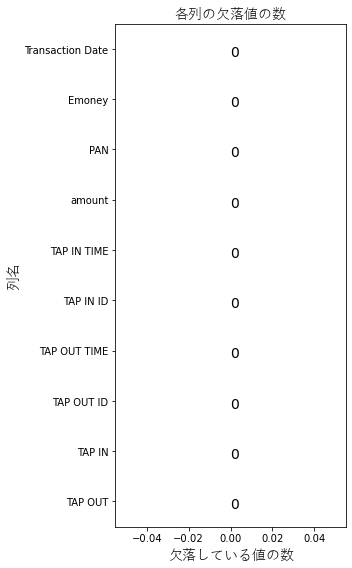

In [8]:
# Missing Values in each columns
temp_dict=mrt_tran_proc_df.isnull().sum().compute()
# Percetange of missing values in the dataset
total_records=712297 
temp_dict = round((temp_dict/total_records) * 100, 2)
x_label = '欠落している値の数'
y_label = '列名'
title = '各列の欠落値の数'
caption = 'Number of missing values in each column'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption)

c:\Users\h1576\Work\Data Analysis Projects\Jakarta Data Analysis\Jakarta-MRT-Transaction\notebook\graphs\eda.py:23: RuntimeWarning: divide by zero encountered in long_scalars
  x = ( df_dict.max() - df_dict.min() )// (df_dict.count()-5)


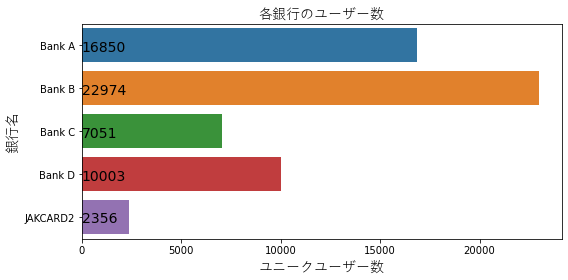

In [11]:
# Which Bank has the highest users?
temp_dict=mrt_tran_proc_df.groupby('Emoney').PAN.nunique().compute()
x_label = 'ユニークユーザー数'
y_label = '銀行名'
title = '各銀行のユーザー数'
caption = 'Number of users in each bank'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption, size=(8,4))

c:\Users\h1576\Work\Data Analysis Projects\Jakarta Data Analysis\Jakarta-MRT-Transaction\notebook\graphs\eda.py:23: RuntimeWarning: divide by zero encountered in floor_divide
  x = ( df_dict.max() - df_dict.min() )// (df_dict.count()-5)


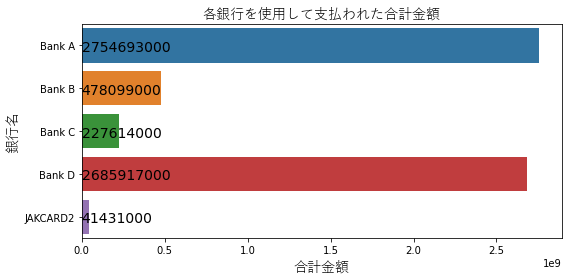

In [6]:
# Which Bank has paid the highest amount?
temp_dict=mrt_tran_proc_df.groupby('Emoney').amount.sum().compute()
x_label = '合計金額'
y_label = '銀行名'
title = '各銀行を使用して支払われた合計金額'
caption = 'Total amount paid using each bank'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption, size=(8,4))

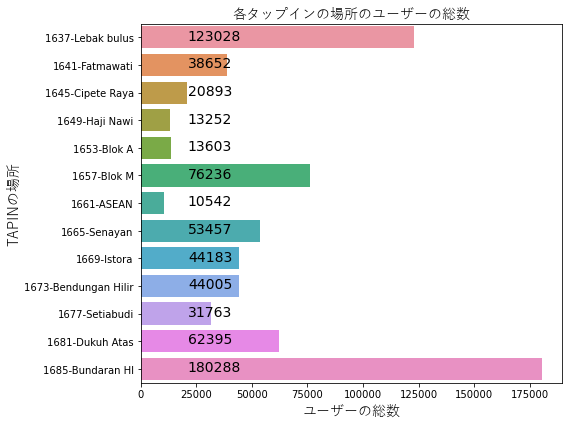

In [11]:
# Which one is the most Tappped In location?
temp_dict=mrt_tran_proc_df.groupby('TAP IN').PAN.count().compute()
x_label = 'ユーザーの総数'
y_label = 'TAPINの場所'
title = '各タップインの場所のユーザーの総数'
caption = 'The total number of users in each Tap In location'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption, size=(8,6)) 

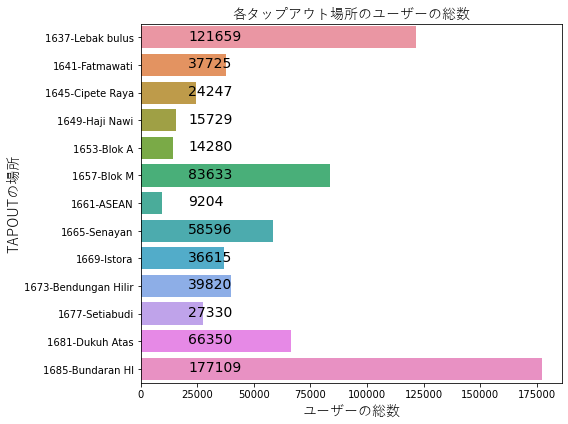

In [12]:
# Which one is the most Tappped Out location?
temp_dict=mrt_tran_proc_df.groupby('TAP OUT').PAN.count().compute()
x_label = 'ユーザーの総数'
y_label = 'TAPOUTの場所'
title = '各タップアウト場所のユーザーの総数'
caption = 'The total number of users in each Tap Out location'
eda.vertical_bar_plot(temp_dict, x_label, y_label, title, caption, size=(8,6)) 

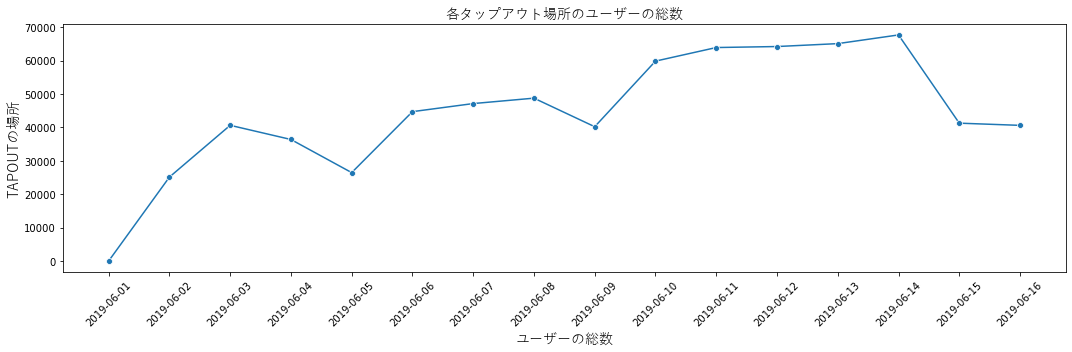

In [7]:
# Which Date people Tap In most?
temp_dict=mrt_tran_proc_df.groupby('TAP IN DATE').PAN.count().compute()
x_label = '日にち'
y_label = 'ユーザーの総数'
title = '各タップイン日のユーザーの総数'
caption = 'The total number of users in each Tap In Date'
eda.two_var_line_plot(temp_dict, x_label, y_label, title, caption, size=(4,4))

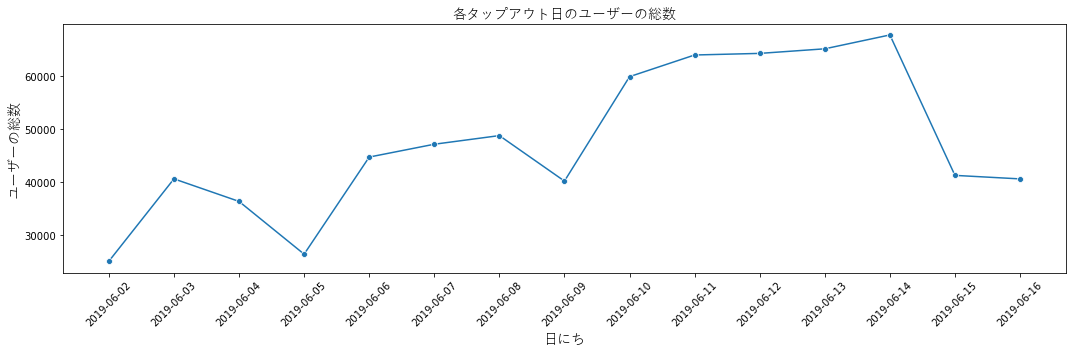

In [8]:
# Which Date people Tap Out most?
temp_dict=mrt_tran_proc_df.groupby('TAP OUT DATE').PAN.count().compute()
x_label = '日にち'
y_label = 'ユーザーの総数'
title = '各タップアウト日のユーザーの総数'
caption = 'The total number of users in each Tap Out Date'
eda.two_var_line_plot(temp_dict, x_label, y_label, title, caption, size=(4,4))

In [11]:
# Which Location and Date people Tap In most?
temp_dict=mrt_tran_proc_df.groupby(['TAP IN DATE', 'TAP IN']).PAN.count().compute()
temp_df = temp_dict.reset_index()
x_label = '日にち'
y_label = 'ユーザーの総数'
title = '各タップイン日のユーザーの総数'
caption = 'The total number of users in each Tap In Date by Location'
eda.three_var_line_plot(temp_df, 
        x='TAP IN DATE', y='PAN', z='TAP IN',
        x_label, y_label, title, caption, size=(4,4))

In [10]:
temp_dict.reset_index()

,TAP IN DATE,TAP IN,PAN
0,2019-06-01,1665-Senayan,2
1,2019-06-01,1677-Setiabudi,1
2,2019-06-01,1685-Bundaran HI,10
3,2019-06-02,1637-Lebak bulus,4770
4,2019-06-02,1641-Fatmawati,1073
...,...,...,...
193,2019-06-16,1669-Istora,2204
194,2019-06-16,1673-Bendungan Hilir,1438
195,2019-06-16,1677-Setiabudi,1168
196,2019-06-16,1681-Dukuh Atas,3151
